In [4]:
# YASH KUMAR SINGH
# 202151181
# Assignment 9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
cookie_cats_data = pd.read_csv('cookie_cats.csv')

# Task 1: Compute average "sum gamerounds" for each version
average_gamerounds_by_version = cookie_cats_data.groupby('version')['sum_gamerounds'].mean()
print("Average sum gamerounds by version:")
print(average_gamerounds_by_version)

# Print which version is better
better_version = average_gamerounds_by_version.idxmax()
print(f"\nThe better version is: {better_version}")



Average sum gamerounds by version:
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

The better version is: gate_30



Permutation Test:
The p-value is: 0.762
There is no significant difference in average sum gamerounds between versions.


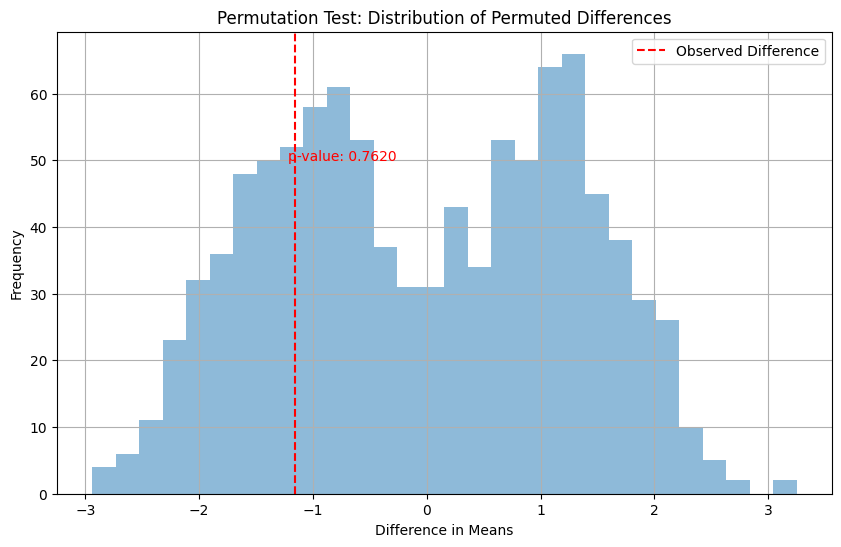

In [5]:
# Task 2: Perform permutation test to check for statistically significant difference

# Define a function to calculate the difference in means
def difference_in_means(data, column):
    group_means = data.groupby('version')[column].mean()
    return group_means.diff().iloc[-1]

# Define a function for permutation resampling
def permutation_test(data, column, num_permutations):
    observed_difference = difference_in_means(data, column)
    concatenated_data = data[column].values
    permuted_differences = np.zeros(num_permutations)
    
    for i in range(num_permutations):
        np.random.shuffle(concatenated_data)
        permuted_data = pd.DataFrame({'version': data['version'], column: concatenated_data})
        permuted_difference = difference_in_means(permuted_data, column)
        permuted_differences[i] = permuted_difference
        
    p_value = np.sum(permuted_differences >= observed_difference) / num_permutations
    return permuted_differences, observed_difference, p_value

# Perform permutation test with 10,000 permutations
permuted_differences, observed_difference, p_value = permutation_test(cookie_cats_data, 'sum_gamerounds', 1000)

# Print the p-value
print("\nPermutation Test:")
print("The p-value is:", p_value)
if p_value < 0.05:
    print("The difference in average sum gamerounds between versions is statistically significant.")
else:
    print("There is no significant difference in average sum gamerounds between versions.")

# Plot the probability graph
def plot_permutation_distribution(permuted_differences, observed_difference, p_value):
    plt.figure(figsize=(10, 6))
    plt.hist(permuted_differences, bins=30, alpha=0.5)
    plt.axvline(x=observed_difference, color='red', linestyle='--', label='Observed Difference')
    plt.title('Permutation Test: Distribution of Permuted Differences')
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.text(observed_difference * 1.05, 50, f'p-value: {p_value:.4f}', color='red')
    plt.show()

# Plot the distribution of permuted differences along with the observed difference
plot_permutation_distribution(permuted_differences, observed_difference, p_value)
